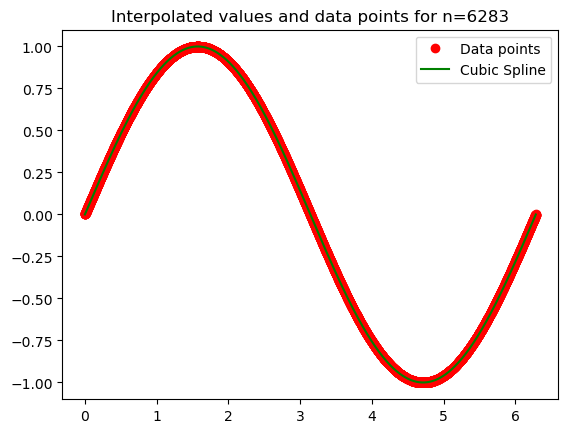

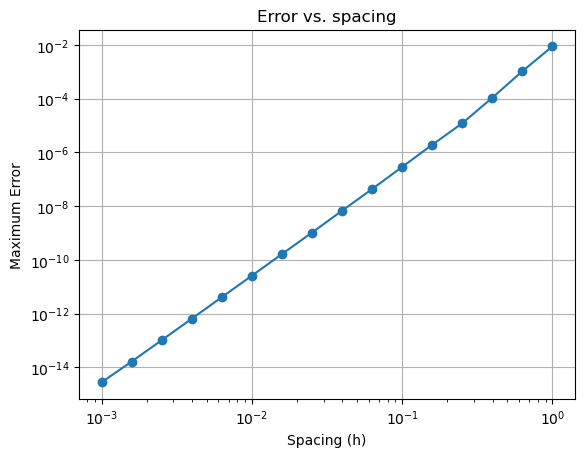

In [14]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

# Define spacing values
h = np.logspace(-3, 0, 16)
N = (2.0 * np.pi) / h
err = np.zeros(h.shape)

for i in range(len(h)):
    x = np.linspace(0, 2 * np.pi, int(N[i]))
    y = np.sin(x)
    n = int(N[i])
    xx = np.linspace(0, 2 * np.pi, 10 * n + 1)
    
    # Create cubic spline interpolation object
    cs = CubicSpline(x, y, bc_type='periodic')
    
    # Evaluate spline at new points
    yy = cs(xx)
    
    if i == 0:
        plt.figure(0)
        plt.plot(x, y, 'ro', label='Data points')
        plt.plot(xx, yy, 'g', label='Cubic Spline')
        plt.title("Interpolated values and data points for n=%d" % N[i])
        plt.legend()
    
    # Compute the maximum error
    z = np.abs(yy - np.sin(xx))
    err[i] = z.max()

plt.figure(1)
plt.loglog(h, err, marker='o')
plt.title("Error vs. spacing")
plt.xlabel("Spacing (h)")
plt.ylabel("Maximum Error")
plt.grid(True)
plt.show()


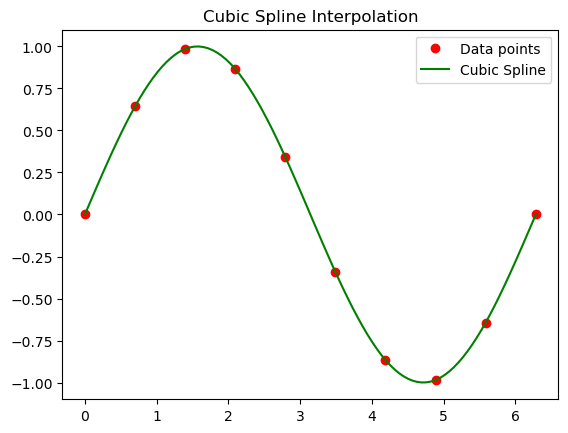

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def spline(x, y):
    """
    Computes the second derivatives of the spline at the points x.

    Parameters:
    x (array-like): The x-coordinates of the data points.
    y (array-like): The y-coordinates of the data points.
    yp1 (float): First derivative at the first data point.
    ypn (float): First derivative at the last data point.

    Returns:
    y2 (numpy.ndarray): The second derivatives of the spline at each x.
    """
    n = len(x)
    y2 = np.zeros(n)
    u = np.zeros(n)

    # Boundary conditions
    y2[n-1] = 0
    y2[1] = 0

    # Main loop
    for i in range(1, n - 1):
        sig = (x[i] - x[i - 1]) / (x[i + 1] - x[i - 1])
        p = sig * y2[i - 1] + 2.0
        y2[i] = (sig - 1.0) / p
        u[i] = (6.0 * ((y[i + 1] - y[i]) / (x[i + 1] - x[i]) - (y[i] - y[i - 1]) / (x[i] - x[i - 1])) / (x[i + 1] - x[i - 1]) - sig * u[i - 1]) / p

    # End boundary conditions


    # Back substitution
    for k in range(n - 2, -1, -1):
        y2[k] = y2[k] * y2[k + 1] + u[k]

    return y2

def splint(xa, ya, y2a, x):
    """
    Evaluates the spline at the given x.

    Parameters:
    xa (array-like): The x-coordinates of the data points.
    ya (array-like): The y-coordinates of the data points.
    y2a (array-like): The second derivatives of the spline.
    x (float): The x-coordinate at which to evaluate the spline.

    Returns:
    y (float): The interpolated value of the spline at x.
    """
    n = len(xa)
    klo = 0
    khi = n - 1

    # Binary search for the correct interval
    while (khi - klo) > 1:
        k = (khi + klo) // 2
        if xa[k] > x:
            khi = k
        else:
            klo = k

    h = xa[khi] - xa[klo]
    if h == 0.0:
        raise ValueError('Bad xa input in splint')

    a = (xa[khi] - x) / h
    b = (x - xa[klo]) / h
    y = (a * ya[klo] + b * ya[khi] +
         ((a**3 - a) * y2a[klo] + (b**3 - b) * y2a[khi]) * (h**2) / 6.0)
    
    return y

# Example usage
x = np.linspace(0, 2 * np.pi, 10)
y = np.sin(x)

# Set boundary conditions: first and last derivatives (natural spline)
yp1 = 0
ypn = 0  

# Compute the second derivatives
y2 = spline(x, y)

# Evaluate the spline at new points
xx = np.linspace(0, 2 * np.pi, 100)
yy = np.array([splint(x, y, y2, xi) for xi in xx])

# Plot the results
plt.figure()
plt.plot(x, y, 'ro', label='Data points')
plt.plot(xx, yy, 'g', label='Cubic Spline')
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.show()


In [7]:
import scipy.special as sp
e = 1e-30
def function(x):
    val = x**(1+sp.j0(x))/np.sqrt((1+100*x**2)*(1-x)+e)
    return val

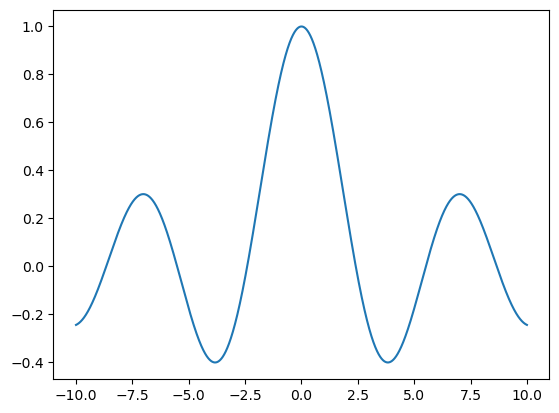

In [13]:
x = np.linspace(-10,10,10000) 
y1 = sp.j0(x)
plt.plot(x,y1)

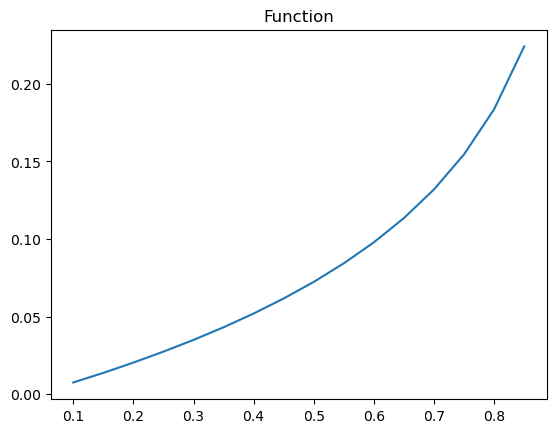

In [11]:
x = np.arange(0.1,0.9,0.05) 
y = function(x)
y1 = sp.j0(x)
plt.plot(x,y)
plt.title("Function")
plt.show()



Function is analytic in 0.1 to 0.9. ROC at 0 is 0.1 and 0.9 is 0.1

1


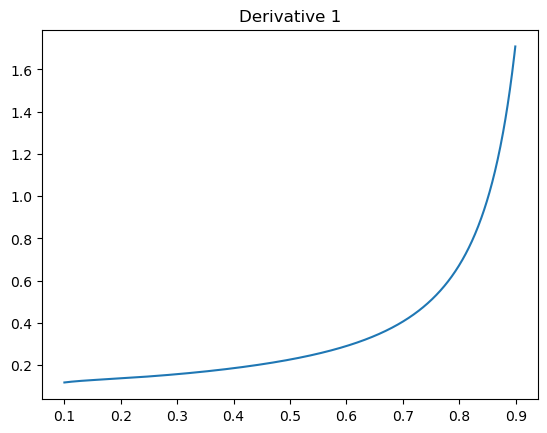

2


C:\Users\bprav\AppData\Local\Temp\ipykernel_78348\2983502996.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(X[:-i],y/x)


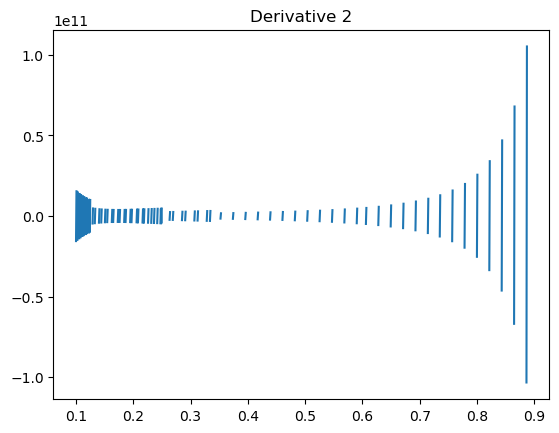

3


C:\Users\bprav\AppData\Local\Temp\ipykernel_78348\2983502996.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(X[:-i],y/x)


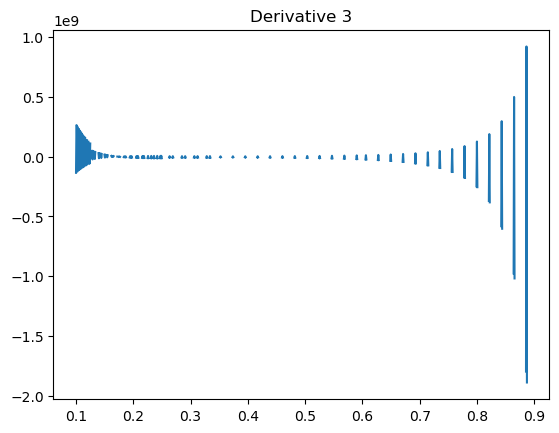

In [36]:
x = np.linspace(0.1,0.9,1000)
X = np.linspace(0.1,0.9,1000)
y = function(x)
for i in range(1,4):
     print(i)
     y = np.diff(y)
     x = np.diff(x)
     plt.plot(X[:-i],y/x)
     plt.title(f"Derivative {i}")
     plt.show()

C:\Users\bprav\AppData\Local\Temp\ipykernel_82620\3161115290.py:3: RuntimeWarning: divide by zero encountered in divide
  val = x**(1+sp.j0(x))/np.sqrt((1+100*x**2)*(1-x))


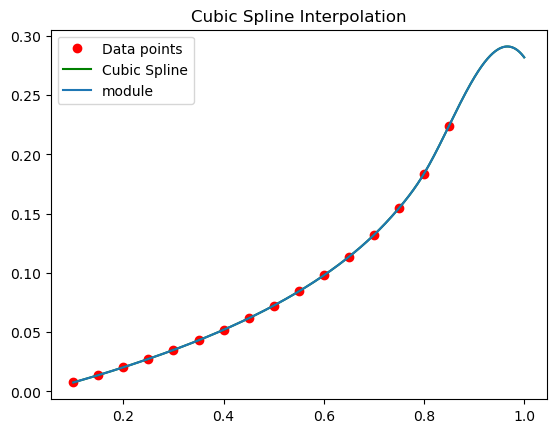

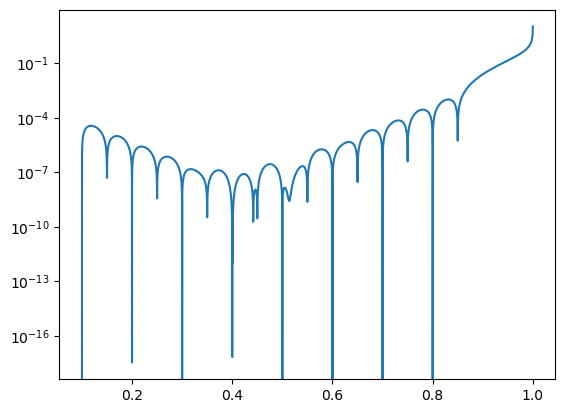

In [6]:

# Compute the second derivatives
y2 = spline(x, y)

# Evaluate the spline at new points
xx = np.linspace(0.1,1, 10000)
yy = np.array([splint(x, y, y2, xi) for xi in xx])
tyy = function(xx)
cs = CubicSpline(x, y, bc_type='natural')
yy2 = cs(xx)

err = np.abs(yy-tyy)
err1 = np.abs(yy2-tyy)

# Plot the results
plt.figure()
plt.plot(x, y, 'ro', label='Data points')
plt.plot(xx, yy, 'g', label='Cubic Spline')
plt.plot(xx,yy2,label ="module")
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.show()
plt.semilogy(xx,err)


100 7.677656412641287e-05
200 1.9098105706605306e-05
300 8.464946010811047e-06
400 4.748363357232055e-06
500 3.0362808689510246e-06
600 2.1062090171941605e-06
700 1.54242878325217e-06
800 1.1844053217080486e-06
900 9.351955912451082e-07


Text(0.5, 1.0, 'Error vs no of points')

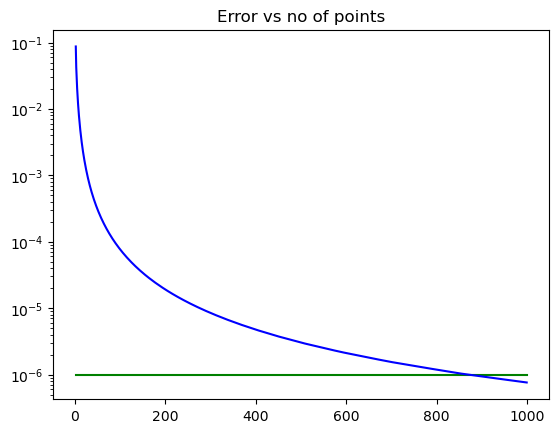

In [24]:
ra = range(2,1000)
error = []
error1 = []
for i in ra:
    x = np.linspace(0.1,0.9,i) 
    y = function(x)



    # Compute the second derivatives
    #y2 = spline(x, y)

    # Evaluate the spline at new points
    xx = np.linspace(0.1,0.9,10000)
    #yy = np.array([splint(x, y, y2, xi) for xi in xx])
    tyy = function(xx)
    #err = np.abs(yy-tyy)
    #error.append(np.max(err))
    cs = CubicSpline(x, y, bc_type='natural')
    yy2 = cs(xx)
    err1 = np.abs(yy2-tyy)
    error1.append(np.max(err1))
    if i%100 == 0 :
        print(i,np.max(err1))
hor = [10**-6 for i in ra]

plt.semilogy(ra,hor,"g",ra,error1,"b")
plt.title('Error vs no of points')





In [25]:
1/4**2

0.0625

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import numpy as np

def spline(x, y, regularization=1e-10):
    """
    Computes the second derivatives of the spline at the points x using the not-a-knot condition,
    with a regularization option to prevent singular matrices.

    Parameters:
    x (array-like): The x-coordinates of the data points.
    y (array-like): The y-coordinates of the data points.
    regularization (float): A small value added to the diagonal to avoid singular matrices.

    Returns:
    y2 (numpy.ndarray): The second derivatives of the spline at each x.
    """
    # Ensure x values are unique
    if len(np.unique(x)) != len(x):
        raise ValueError("The x values must be unique and spaced apart.")

    n = len(x)
    if n < 3:
        raise ValueError("There must be at least three data points to use the not-a-knot condition.")

    y2 = np.zeros(n)

    # Differences between x points and slopes between y points
    h = np.diff(x)
    delta = np.diff(y) / h

    A = np.zeros((n, n))
    B = np.zeros(n)

    # Not-a-knot condition at the first point
    A[0, 0] = h[1]
    A[0, 1] = -(h[0] + h[1])
    A[0, 2] = h[0]

    # Not-a-knot condition at the last point
    A[-1, -3] = h[-2]
    A[-1, -2] = -(h[-2] + h[-1])
    A[-1, -1] = h[-1]

    # Fill the inner points using the natural spline conditions
    for i in range(1, n - 1):
        A[i, i - 1] = h[i - 1]
        A[i, i] = 2 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]
        B[i] = 6 * (delta[i] - delta[i - 1])

    # Regularization to prevent singular matrix errors
    A += np.eye(n) * regularization

    # Solve for the second derivatives
    y2 = np.linalg.solve(A, B)
    
    return y2


def splint(xa, ya, y2a, x):
    """
    Evaluates the spline at the given x.

    Parameters:
    xa (array-like): The x-coordinates of the data points.
    ya (array-like): The y-coordinates of the data points.
    y2a (array-like): The second derivatives of the spline.
    x (float): The x-coordinate at which to evaluate the spline.

    Returns:
    y (float): The interpolated value of the spline at x.
    """
    n = len(xa)
    klo = 0
    khi = n - 1

    # Binary search for the correct interval
    while (khi - klo) > 1:
        k = (khi + klo) // 2
        if xa[k] > x:
            khi = k
        else:
            klo = k

    h = xa[khi] - xa[klo]
    if h == 0.0:
        raise ValueError('Bad xa input in splint')

    a = (xa[khi] - x) / h
    b = (x - xa[klo]) / h
    y = (a * ya[klo] + b * ya[khi] +
         ((a**3 - a) * y2a[klo] + (b**3 - b) * y2a[khi]) * (h**2) / 6.0)
    
    return y




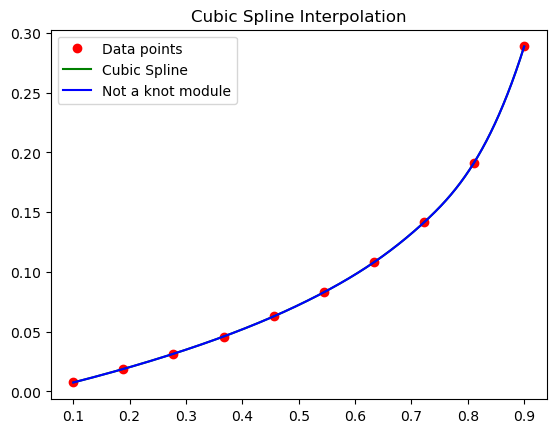

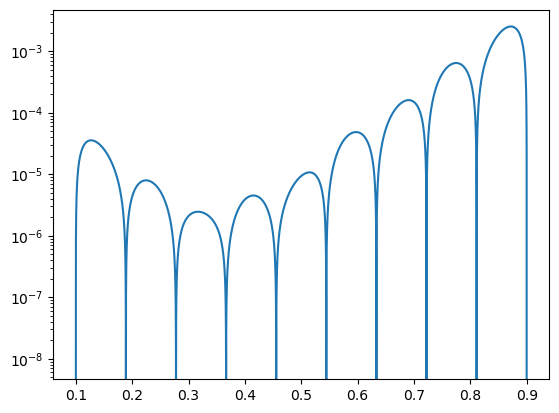

In [10]:
x = np.linspace(0.1,0.9,10) 
y = function(x)

# Compute the second derivatives
y2 = spline(x, y)

# Evaluate the spline at new points
xx = np.linspace(0.1,0.9,10000)
yy = np.array([splint(x, y, y2, xi) for xi in xx])
tyy = function(xx)
cs = CubicSpline(x, y, bc_type='not-a-knot')
yy2 = cs(xx)
err = np.abs(yy-tyy)
err1= np.abs(yy2-tyy)

# Plot the results
plt.figure()
plt.plot(x, y, 'ro', label='Data points')
plt.plot(xx, yy, 'g', label='Cubic Spline')
plt.plot(xx, yy2, 'b', label="Not a knot module" )
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.show()
plt.semilogy(xx,err1)

100 1.7491765703092632e-06
200 1.2759811657270248e-07
300 2.657872527622729e-08
400 8.638447401843052e-09
500 3.5960936450862846e-09
600 1.7531276985671695e-09
700 9.536683664990164e-10
800 5.622928234139124e-10
900 3.526348657523215e-10


Text(0.5, 1.0, 'Error vs no of points')

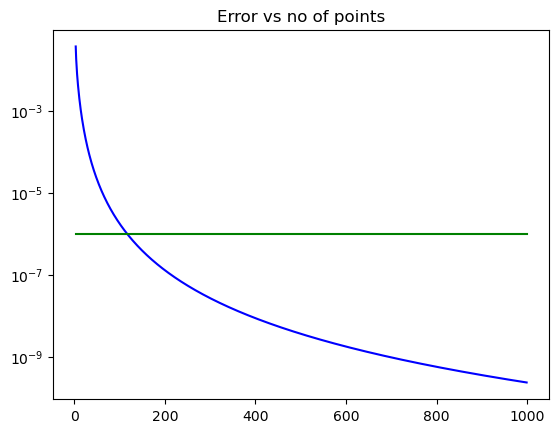

In [55]:
ra = range(3,1000)
error = []
error1 = []
for i in ra:
    x = np.linspace(0.1,0.9,i,endpoint=True) 
    y = function(x)


    # Compute the second derivatives
    #y2 = spline(x, y)
    # Evaluate the spline at new points
    xx = np.linspace(0.1,0.9, 10*i,endpoint=True)
    #yy = np.array([splint(x, y, y2, xi) for xi in xx])
    tyy = function(xx)
    cs = CubicSpline(x, y, bc_type='not-a-knot')
    yy2 = cs(xx)
    #err = np.abs(yy-tyy)
    err1 = np.abs(tyy-yy2)
    #error.append(np.max(err))
    error1.append(np.max(err1))
    if i%100 == 0 :
        print(i,np.max(err1))
hor = [10**-6 for i in ra]
error1not = error1

plt.semilogy(ra,error1,"b",ra,hor,"g")#,ra,error,"r")
plt.title('Error vs no of points')

In [60]:
x = 1
y= x
y = y-1
x

1

In [73]:
e = 1e-30

In [46]:
def p(x):
    return 1-x+100*x**2-100*x**3
def funcder(x):
    val  = ((1+sp.j0(x))/x-sp.j1(x)*np.log(x)-1/2*(-1+200*x-300*x**2)/(p(x)+e))*function(x)
    return val

1.718552382672391 0.11728789794456165 (10,)


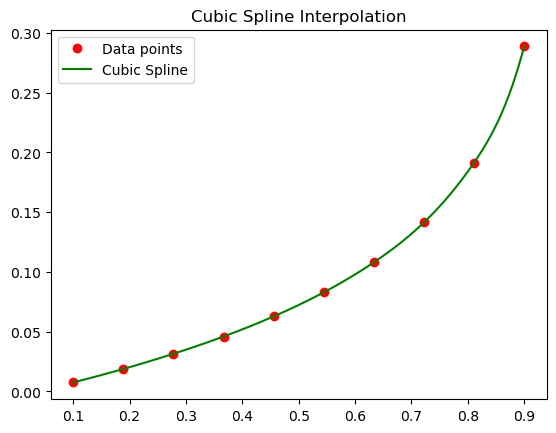

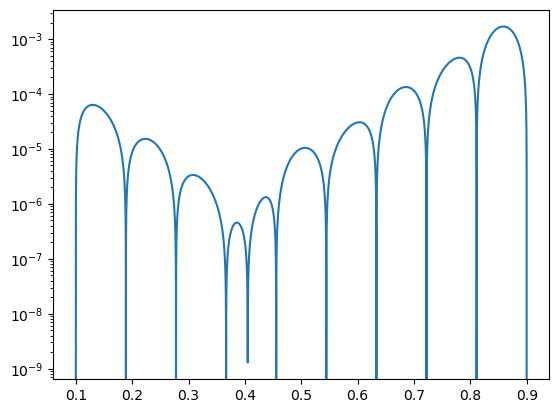

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def spline(x, y, yp1, ypn):
    """
    Computes the second derivatives of the spline at the points x.

    Parameters:
    x (array-like): The x-coordinates of the data points.
    y (array-like): The y-coordinates of the data points.
    yp1 (float): First derivative at the first data point.
    ypn (float): First derivative at the last data point.

    Returns:
    y2 (numpy.ndarray): The second derivatives of the spline at each x.
    """
    n = len(x)
    y2 = np.zeros(n)
    u = np.zeros(n)

    # Boundary conditions
    if yp1 > 0.99e30:
        y2[0] = 0.0
    else:
        y2[0] = (3.0 / (x[1] - x[0])) * ((y[1] - y[0]) / (x[1] - x[0]) - yp1)

    # Main loop
    for i in range(1, n - 1):
        sig = (x[i] - x[i - 1]) / (x[i + 1] - x[i - 1])
        p = sig * y2[i - 1] + 2.0
        y2[i] = (sig - 1.0) / p
        u[i] = (6.0 * ((y[i + 1] - y[i]) / (x[i + 1] - x[i]) - (y[i] - y[i - 1]) / (x[i] - x[i - 1])) / (x[i + 1] - x[i - 1]) - sig * u[i - 1]) / p

    # End boundary conditions
    if ypn > 0.99e30:
        y2[n-1] = 0.0
    else:
        y2[n-1] = (3.0 / (x[n - 1] - x[n - 2])) * (ypn - (y[n - 1] - y[n - 2]) / (x[n - 1] - x[n - 2]))

  

    # Back substitution
    for k in range(n - 2, -1, -1):
        y2[k] = y2[k] * y2[k + 1] + u[k]

    return y2

def splint(xa, ya, y2a, x):
    """
    Evaluates the spline at the given x.

    Parameters:
    xa (array-like): The x-coordinates of the data points.
    ya (array-like): The y-coordinates of the data points.
    y2a (array-like): The second derivatives of the spline.
    x (float): The x-coordinate at which to evaluate the spline.

    Returns:
    y (float): The interpolated value of the spline at x.
    """
    n = len(xa)
    klo = 0
    khi = n - 1

    # Binary search for the correct interval
    while (khi - klo) > 1:
        k = (khi + klo) // 2
        if xa[k] > x:
            khi = k
        else:
            klo = k

    h = xa[khi] - xa[klo]
    if h == 0.0:
        raise ValueError('Bad xa input in splint')

    a = (xa[khi] - x) / h
    b = (x - xa[klo]) / h
    y = (a * ya[klo] + b * ya[khi] +
         ((a**3 - a) * y2a[klo] + (b**3 - b) * y2a[khi]) * (h**2) / 6.0)
    
    return y

x = np.linspace(0.1,0.9,10) 
y = function(x)

# Set boundary conditions: first and last derivatives (natural spline)
yp1 = funcder(x[0])  # Derivative at the start
ypn = funcder(x[-1]) # Derivative at the end

print(ypn,yp1,x.shape)

# Compute the second derivatives
y2 = spline(x, y, yp1, ypn)

# Evaluate the spline at new points
xx = np.linspace(0.1,0.9, 10000)
yy = np.array([splint(x, y, y2, xi) for xi in xx])
tyy = function(xx)
err = np.abs(yy-tyy)

# Plot the results
plt.figure()
plt.plot(x, y, 'ro', label='Data points')
plt.plot(xx, yy, 'g', label='Cubic Spline')
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.show()
plt.semilogy(xx,err)

100 2.144354003807969e-07
200 1.3714580249235553e-08
300 2.724968084510948e-09
400 8.643872839719791e-10
500 3.5454550406655017e-10
600 1.7112944394881424e-10
700 9.242617782234674e-11
800 5.420180970716615e-11
900 3.3848979175132854e-11


Text(0.5, 1.0, 'Error vs no of points')

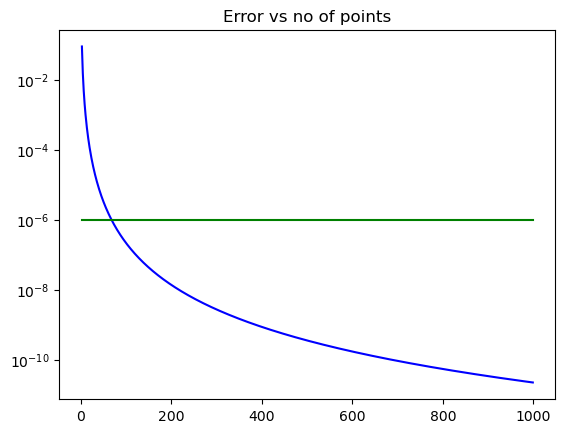

In [56]:
ra = range(2,1000)
error = []
error1 = []
for i in ra:
    x = np.linspace(0.1,0.9,i) 
    y = function(x)


    # Set boundary conditions: first and last derivatives 
    yp1 = funcder(x[0])  # Derivative at the start
    ypn = funcder(x[-1])  # Derivative at the end

    # Compute the second derivatives
    #y2 = spline(x, y, yp1, ypn)

    # Evaluate the spline at new points
    xx = np.linspace(0.1,0.9, 10*i)
    #yy = np.array([splint(x, y, y2, xi) for xi in xx])
    tyy = function(xx)
    #err = np.abs(yy-tyy)
    #error.append(np.max(err))
    cs = CubicSpline(x, y, bc_type=((1, yp1), (1, ypn)))
    yy2 = cs(xx)
    err1 = np.abs(tyy-yy2)
    error1.append(np.max(err1))
    if i%100 == 0 :
        print(i,np.max(err1))
hor = [10**-6 for i in ra]
error1der = error1

plt.semilogy(ra,error1,"b",ra,hor,"g")
plt.title('Error vs no of points')





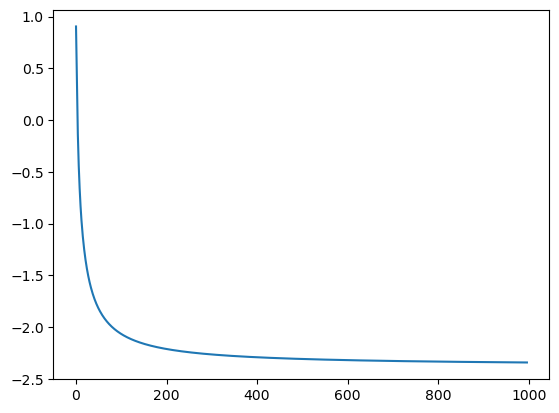

In [81]:
plt.plot([np.log(error1der[i]/error1not[i]) for i in range(len(error1not))])

171.8552382672391 11.728789794456166 (10,)


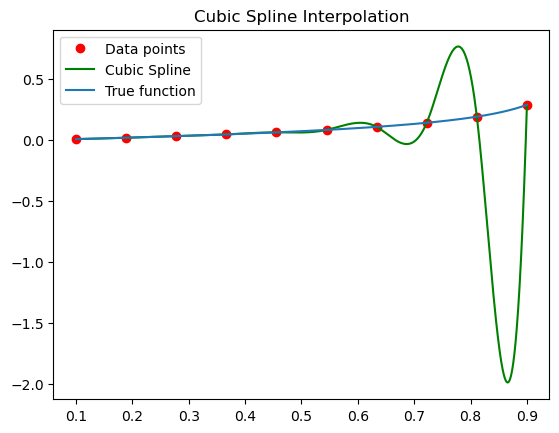

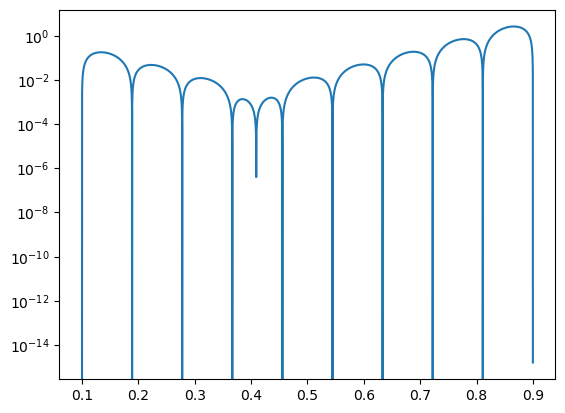

In [16]:
x = np.linspace(0.1,0.9,10) 
y = function(x)

# Set boundary conditions: first and last derivatives (natural spline)
yp1 = 100*funcder(x[0])  # Derivative at the start
ypn = 100*funcder(x[-1]) # Derivative at the end

print(ypn,yp1,x.shape)

# Compute the second derivatives
y2 = spline(x, y, yp1, ypn)

# Evaluate the spline at new points
xx = np.linspace(0.1,0.9, 10000)
yy = np.array([splint(x, y, y2, xi) for xi in xx])
tyy = function(xx)
err = np.abs(yy-tyy)
cs = CubicSpline(x, y, bc_type=((1, yp1), (1, ypn)))
yy2 = cs(xx)
err1 = np.abs(tyy-yy2)

# Plot the results
plt.figure()
plt.plot(x, y, 'ro', label='Data points')
plt.plot(xx, yy, 'g', label='Cubic Spline')
plt.plot(xx,tyy,label = "True function")
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.show()
plt.semilogy(xx,err1)

Text(0.5, 1.0, 'Error vs no of points')

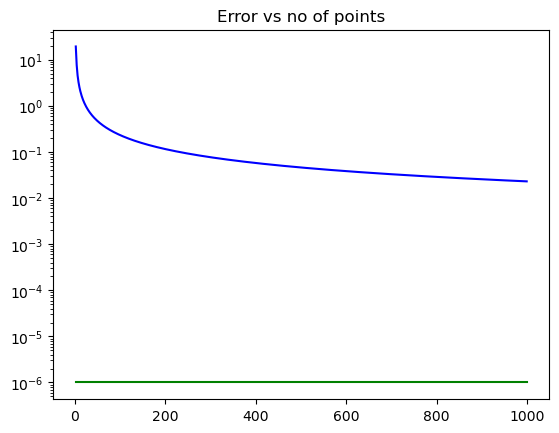

In [39]:
ra = range(2,1000)
error = []
error1 = []
for i in ra:
    x = np.linspace(0.1,0.9,i) 
    y = function(x)


    yp1 = 100*funcder(x[0])  # Derivative at the start
    ypn = 100*funcder(x[-1])  # Derivative at the end

    # Compute the second derivatives
    #y2 = spline(x, y, yp1, ypn)

    # Evaluate the spline at new points
    xx = np.linspace(0.1,0.9, 10*i)
    #yy = np.array([splint(x, y, y2, xi) for xi in xx])
    tyy = function(xx)
    #err = np.abs(yy-tyy)
    #error.append(np.max(err))
    cs = CubicSpline(x, y, bc_type=((1, yp1), (1, ypn)))
    yy2 = cs(xx)
    err1 = np.abs(tyy-yy2)
    error1.append(np.max(err1))
hor = [10**-6 for i in ra]

plt.semilogy(ra,error1,"b",ra,hor,"g")
plt.title('Error vs no of points')


In [66]:
ra = range(3,100000)
error1 = []
miner = np.Infinity
for i in ra:
    x = np.sort(np.random.uniform(low=0.1, high=0.9, size=(100,)))
    y = function(x)
    xx = np.linspace(0.1,0.9, 1000)

        # Set boundary conditions: first and last derivatives (natural spline)
    yp1 = funcder(x[0])  # Derivative at the start
    ypn = funcder(x[-1])  # Derivative at the end

    # Compute the second derivatives
    #y2 = spline(x, y, yp1, ypn)


    #yy = np.array([splint(x, y, y2, xi) for xi in xx])
    tyy = function(xx)
    #err = np.abs(yy-tyy)
    #error.append(np.max(err))
    cs = CubicSpline(x, y, bc_type=((1, yp1), (1, ypn)))
    yy2 = cs(xx)
    err1 = np.abs(tyy-yy2)
    error1.append(np.max(err1))


    
    if np.std(err1)<miner:
        miner =  np.std(err1)
        minx = x
        print(miner)

print(minx,miner)




1.949516399073295e-07
1.9479920205839444e-07
1.6403696018761485e-07
1.5419092877332815e-07
1.069331398179563e-07
5.033874245967274e-08
4.770911384803227e-08
4.525103036655898e-08
4.041288352515542e-08
3.598921369966817e-08
3.11374127522483e-08
2.585623822361123e-08
[0.1027508  0.12090256 0.1215806  0.13701899 0.1454775  0.14951004
 0.15986569 0.19249212 0.21419454 0.22100651 0.22112151 0.2323971
 0.23736424 0.24401288 0.25734872 0.25902136 0.27102725 0.27636731
 0.2807594  0.28712108 0.29682104 0.2989881  0.30245592 0.3071156
 0.30880512 0.31244497 0.31532364 0.33877303 0.34033533 0.34675965
 0.347726   0.35772829 0.37051883 0.37388307 0.37393422 0.37628023
 0.37812451 0.38410489 0.40807513 0.42063258 0.43182623 0.4488626
 0.4542795  0.47647946 0.47929443 0.48688414 0.48942198 0.5189259
 0.53954905 0.54157022 0.55603403 0.56106797 0.56176485 0.58024862
 0.59231046 0.59326686 0.59622915 0.59915402 0.6124618  0.62656976
 0.63675774 0.63736519 0.65238519 0.65759095 0.66836796 0.68893943
 

99


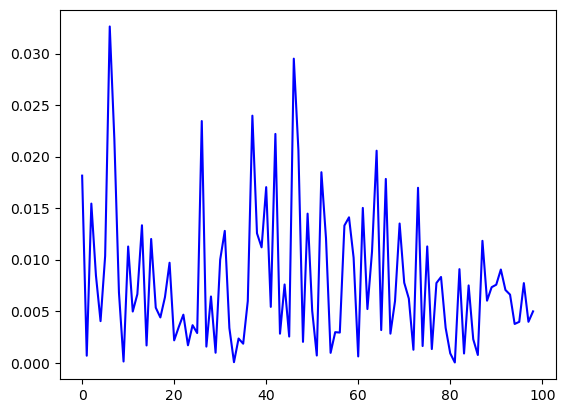

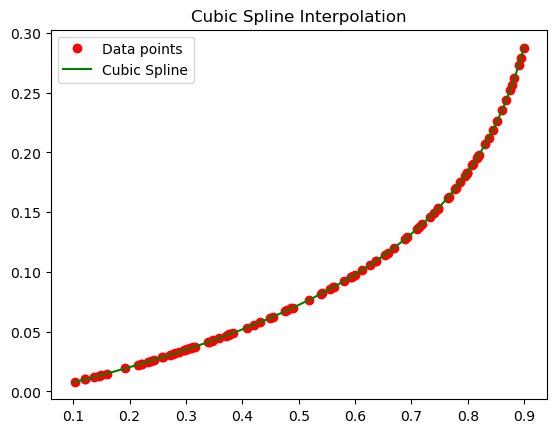

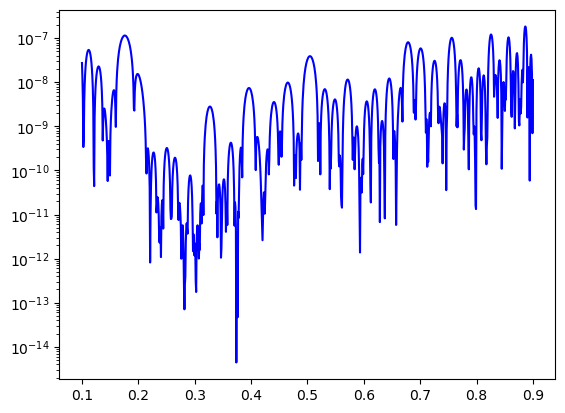

In [67]:
x = minx

y = function(x)


xx = np.linspace(0.1,0.9, 1000)

    # Set boundary conditions: first and last derivatives (natural spline)
yp1 = funcder(x[0])  # Derivative at the start
ypn = funcder(x[-1])  # Derivative at the end

# Compute the second derivatives
#y2 = spline(x, y, yp1, ypn)


#yy = np.array([splint(x, y, y2, xi) for xi in xx])
tyy = function(xx)
#err = np.abs(yy-tyy)
#error.append(np.max(err))
cs = CubicSpline(x, y, bc_type=((1, yp1), (1, ypn)))
yy2 = cs(xx)
err1 = np.abs(tyy-yy2)
print(np.diff(minx).size)

# Plot the results
plt.figure()
plt.plot(np.diff(minx),'b')
plt.show()
plt.figure()
plt.plot(x, y, 'ro', label='Data points')
plt.plot(xx, yy2, 'g', label='Cubic Spline')
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.show()
plt.semilogy(xx,err1,'b')

In [20]:
Miroshnichenko V.L.
On the error of approximation by interpolating cubic splines, III
Spline Approximation and Numerical Analysis, Computing systems, vol. 108 (1985), pp. 3-30


Cubic spline interpolation with optimal end conditions
Author links open overlay panelMeng Sun
, Lin Lan, Chun-Gang Zhu, Fengchun Lei

SyntaxError: invalid syntax (2854548324.py, line 1)

Text(0.5, 1.0, 'Error vs no of points')

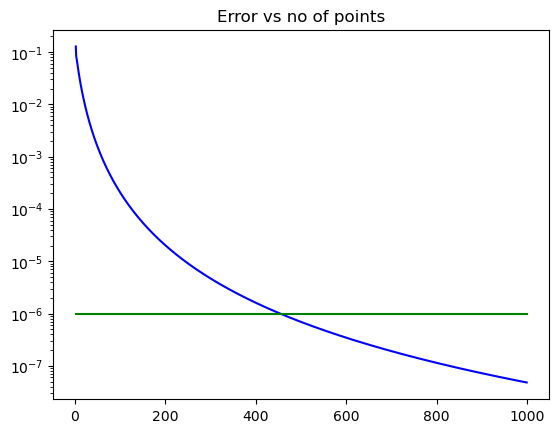

In [79]:
ra = range(2,1000)
error = []
error1 = []
for i in ra:
    x = np.geomspace(0.1, 0.9, num=i,endpoint=False) 
    y = function(x)


    # Set boundary conditions: first and last derivatives 
    yp1 = funcder(x[0])  # Derivative at the start
    ypn = funcder(x[-1])  # Derivative at the end

    # Compute the second derivatives
    
    #y2 = spline(x, y, yp1, ypn)

    # Evaluate the spline at new points
    xx = np.linspace(0.1,0.9, 10*i)
    #yy = np.array([splint(x, y, y2, xi) for xi in xx])
    tyy = function(xx)
    #err = np.abs(yy-tyy)
    #error.append(np.max(err))
    cs = CubicSpline(x, y, bc_type=((1, yp1), (1, ypn)))
    yy2 = cs(xx)
    err1 = np.abs(tyy-yy2)
    error1.append(np.max(err1))
hor = [10**-6 for i in ra]

plt.semilogy(ra,error1,"b",ra,hor,"g")
plt.title('Error vs no of points')
